In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('santander-customer-satisfaction (1)\\train.csv')
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


<Axes: xlabel='TARGET', ylabel='count'>

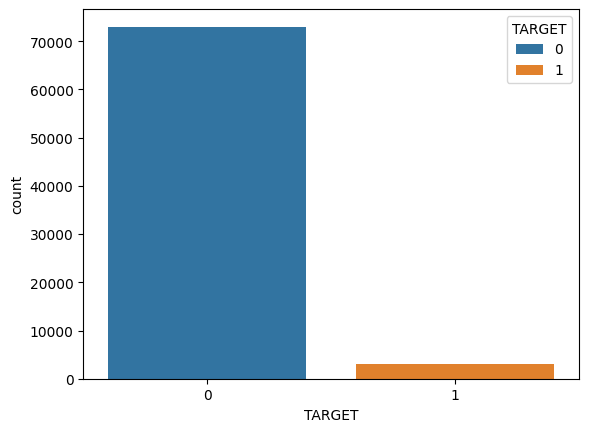

In [3]:
sns.countplot(x=df_train['TARGET'], data=df_train, hue=df_train['TARGET'])
# so this imbalance data. we need to balance it by using smote.

## DataSet(df_train)

In [4]:
# our data is df_train
x = df_train.drop('TARGET', axis='columns')
y = df_train['TARGET']
x.shape

(76020, 370)

In [5]:
y.shape

(76020,)

## Balance the data by using SMOTE

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)
# so , based on minority data it creates synthetic data then data is balanced.

## StandardScaler

In [7]:
# scaling
from sklearn.preprocessing import Stand
ardScaler
ss = StandardScaler()
x_scl = ss.fit_transform(x_sm)

##  PCA(reduce the dimensionality)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=160)
x_pca = pca.fit_transform(x_scl)
x_pca.shape
# o.90 which returns the 90% usefull features and pca is convert values into scaler

(146024, 160)

## Split the dataset

In [9]:
# so our finally data is x_scl and y_sm.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_sm, test_size=0.2, random_state=30)

## LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
lr.score(x_test, y_test)
lr.score(x_train, y_train)

0.8594321129268355

## DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.9080294470124979

## RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.9431604177366889

In [14]:
# we can RandomForestClassifier model it gives best accuracy.
y_test_predict = rfc.predict(x_test)
y_test_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## ROC

In [15]:
# roc on testing data
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, y_test_predict)
roc

0.9431608766197177

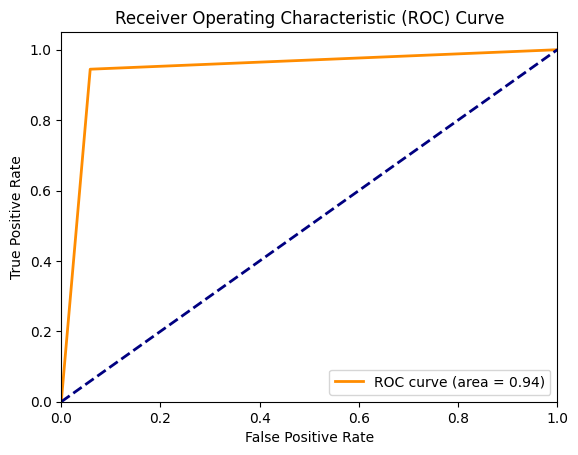

In [16]:
#roc curve on test_data
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Accuracy Score

In [17]:
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_test_predict)
acc

0.9431604177366889

## confusion_matrix

<Axes: >

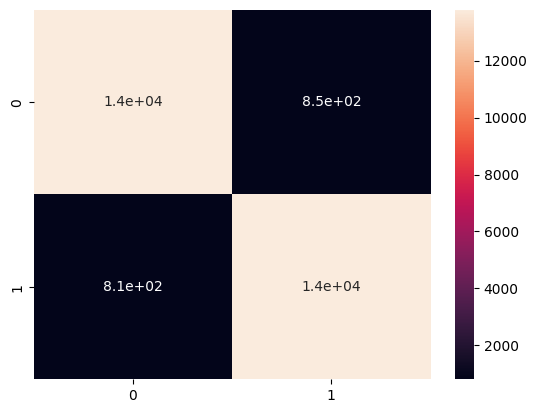

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, annot=True)

In [27]:
from sklearn.metrics import classification_report
cm = classification_report(y_test, y_test_predict)
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14607
           1       0.94      0.94      0.94     14598

    accuracy                           0.94     29205
   macro avg       0.94      0.94      0.94     29205
weighted avg       0.94      0.94      0.94     29205



## 
df_test

In [19]:
import pandas as pd
df_test = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\test.csv')
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [20]:
# after we use of test_df
from sklearn.decomposition import PCA
pca = PCA(n_components=160)
# pca = PCA(0.95)
x_test_pca = pca.fit_transform(df_test)
x_pca.shape
# o.90 which returns the 90% usefull features and pca is convert values into scaler

(146024, 160)

In [21]:
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_test_scl = ss.fit_transform(x_test_pca)

In [22]:
x_test_scl
# Now our data is ready

array([[-0.07078246, -0.03285022, -0.0210881 , ..., -0.06395041,
        -0.01642443,  0.03667372],
       [-0.07078246, -0.03285022, -0.0210881 , ..., -0.17986264,
        -0.04584254, -0.01072387],
       [-0.07078246, -0.03285022, -0.0210881 , ...,  0.04920218,
         0.41376133,  0.1714915 ],
       ...,
       [-0.07078246, -0.03285022, -0.0210881 , ..., -0.0439116 ,
         0.09173065, -0.00647064],
       [-0.07078246, -0.03285022, -0.0210881 , ..., -0.06693893,
         0.01245932,  0.02531532],
       [-0.07078246, -0.03285022, -0.0210881 , ..., -0.05762634,
        -0.01809543, -0.00124159]])

In [23]:
 x_test_predict = rfc.predict(x_test_scl)

In [24]:
count_0 = 0
count_1 = 0
for i in x_test_predict:
    if i == 1:
        count_1 += 1
    else:
        count_0 += 1
print(f'count_1 is {count_1}')
print(f'count_0 is {count_0}')

count_1 is 65660
count_0 is 10158


In [25]:
import pandas as pd


# Create DataFrame
df_final_sub = pd.DataFrame({'ID': df_test['ID'], 'Target': x_test_predict})

# Show the DataFrame
df_final_sub.head()

,ID,Target
0,2,1
1,5,1
2,6,1
3,7,1
4,9,1


In [37]:
df_final_sub.to_csv('df_final_val.csv', index=False)